In [1]:
%reload_ext autoreload
%autoreload 2



In [2]:
import backtest
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


bt = backtest.Backtest('eth_usd.csv', 'aave_users.json')
bt.set_max_ltv_from_ema(1/100)

result = bt.compute_apy(
        '2019-04-15',
        720,
        0.04,
        0.08,
        0.5)
print(result)

{'apy_net': 0.1487575700047263, 'apy_avg': 0.09370720989816324, 'apy': 0.1487575700047263, 'last_health_factor': 3.762716304997928, 'pending_funding_eth': 0.13230580271354625}


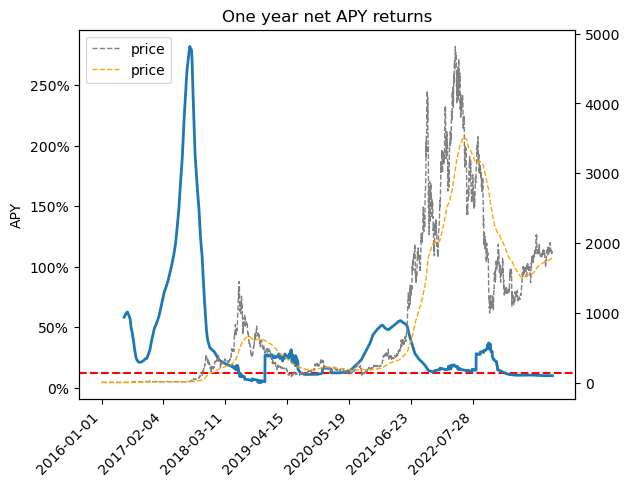

In [10]:

def pre_format_plt(title='One year net APY returns'):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_ylabel('APY')
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(
            lambda x, p: '%.0f%%' % (x*100)
        )
    )
    plt.axhline(y=0.12, color='r', linestyle='--')
    return fig, ax

def post_format_plt(ax):
    ax.set(xticks=ax.get_xticks()[::400],
           xticklabels=ax.get_xticklabels()[::400])
    plt.xticks(rotation=45, ha='right')


result = bt.compute_apy_series(
    '2016-01-01',
    360,
    0.04,
    0.08,
    0.5)

ylr = pd.json_normalize(result)
prices_df = pd.json_normalize(bt.ethusd)

fig, ax = pre_format_plt()
plt.plot(ylr['date'], ylr['apy'], label='1 year APY', linewidth=2)
post_format_plt(ax)

ax2 = ax.twinx()
#ax2.plot(ylr['date'], ylr['last_health_factor'], linewidth=1, linestyle='--', color='green', label='last HF')
ax2.plot(prices_df['date'], prices_df['price'], linewidth=1, linestyle='--', color='gray', label='price')
ax2.plot(prices_df['date'], prices_df['ema'], linewidth=1, linestyle='--', color='orange', label='price')
#ax2.axhline(y=1, color='black', linestyle='--', linewidth=1)

plt.legend(loc='upper left')